<a href="https://colab.research.google.com/github/Jane2210/Finco/blob/main/Household_Sector_Deposits_Financial_Access_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import statistics
import numpy as np
import scipy.stats as stats
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving FAS.csv to FAS.csv


In [ ]:
import io
import matplotlib.pyplot as plt

filename = list(uploaded.keys())[0]
file_contents = uploaded[filename]

financialAccessSurvey = pd.read_csv(io.BytesIO(file_contents))

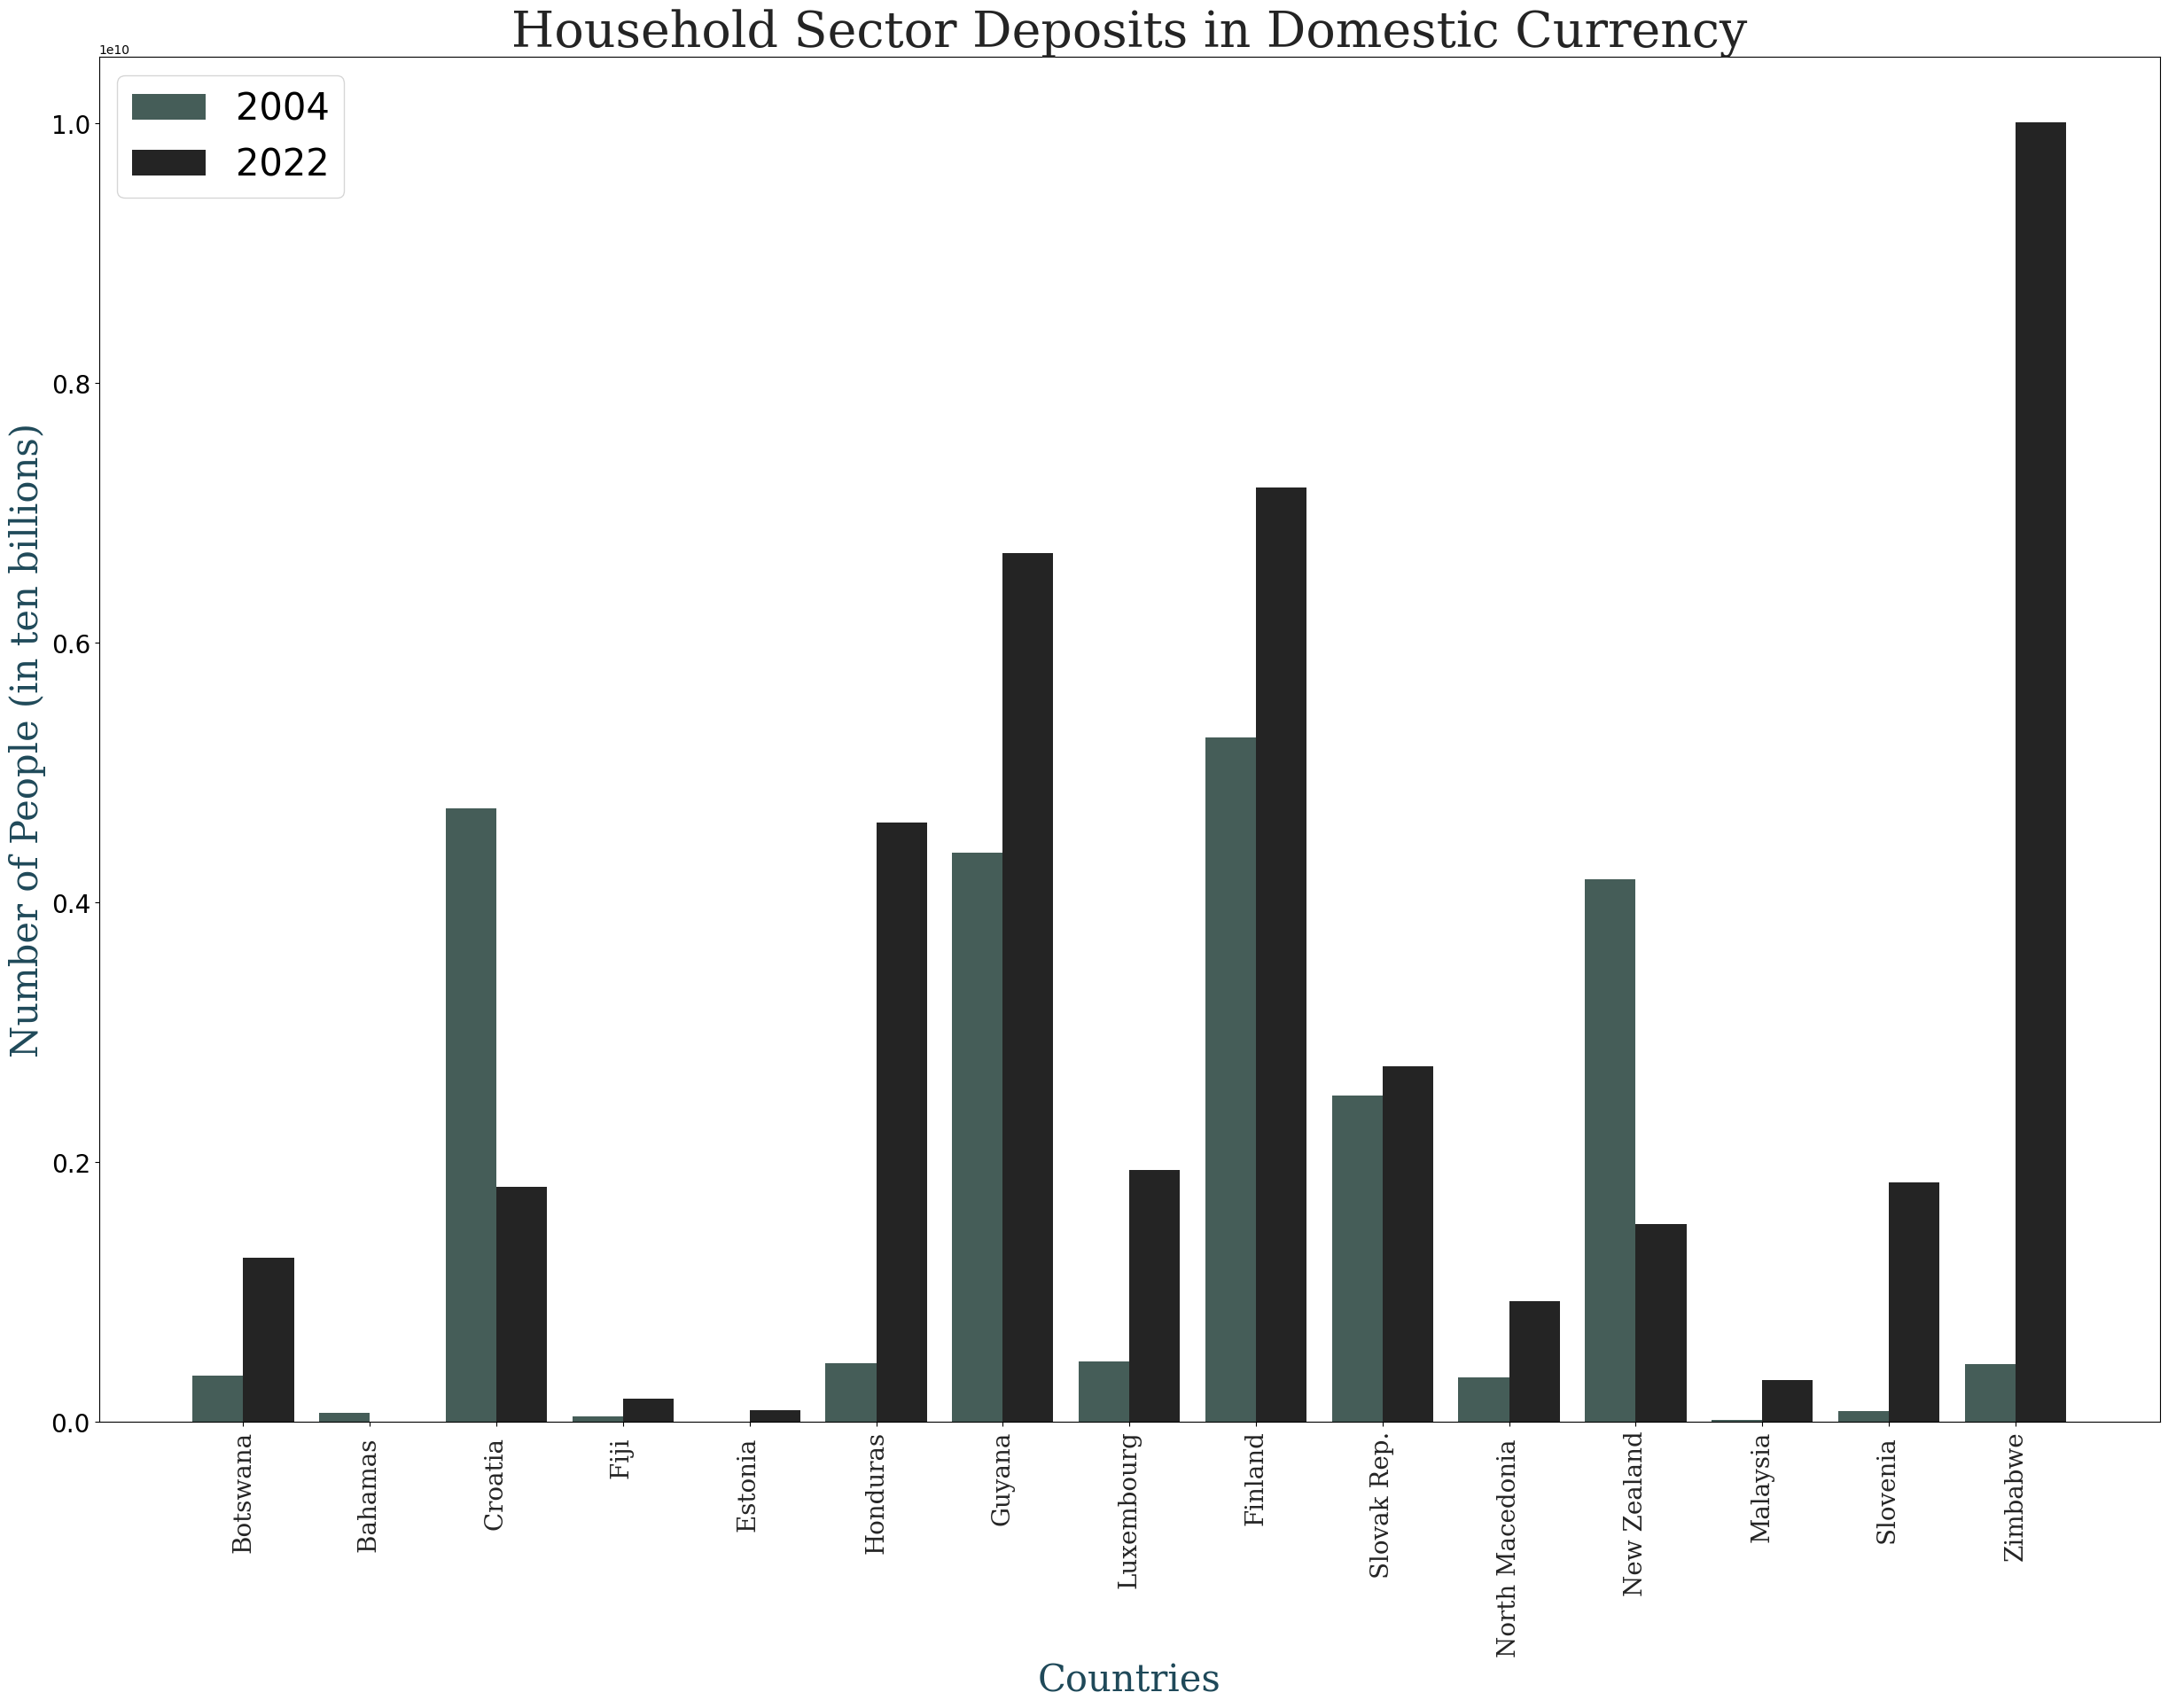

<Figure size 640x480 with 0 Axes>

In [ ]:
# DATA CLEANING: Cleaning Columns

#Sort by Indicator Code FCLODDH_XDC, and filter items from 2004 to 2022
financialAccessSurvey = financialAccessSurvey.filter(items=['Country Name', 'Indicator Name', 'Indicator Code','2004', '2022'])
financialAccessSurvey = financialAccessSurvey[(financialAccessSurvey['Indicator Code'] == "FCLODDH_XDC")]

#Change the datatype of all values in the 2022 column from object to float
convert_dict = {'2022': float}
financialAccessSurvey = financialAccessSurvey.astype(convert_dict)

# DATA CLEANING: Cleaning labels

#remove values with null rows
financialAccessSurvey = financialAccessSurvey.dropna()

#replace 1e10 with ten billion
financialAccessSurvey["2004"] = financialAccessSurvey["2004"].replace(1e10, 10000000000)
financialAccessSurvey["2004"] = financialAccessSurvey["2004"].replace(1e9, 1000000000)
financialAccessSurvey["2004"] = financialAccessSurvey["2004"].replace(1e8, 100000000)
financialAccessSurvey["2004"] = financialAccessSurvey["2004"].replace(1e7, 10000000)
financialAccessSurvey["2004"] = financialAccessSurvey["2004"].replace(1e6, 1000000)
financialAccessSurvey["2022"] = financialAccessSurvey["2022"].replace(1e10, 10000000000)
financialAccessSurvey["2022"] = financialAccessSurvey["2022"].replace(1e9, 1000000000)
financialAccessSurvey["2022"] = financialAccessSurvey["2022"].replace(1e8, 100000000)
financialAccessSurvey["2022"] = financialAccessSurvey["2022"].replace(1e7, 10000000)
financialAccessSurvey["2022"] = financialAccessSurvey["2022"].replace(1e6, 1000000)

#Cleaning up labels
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace(",", '')
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace("The", '')
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace("Republic of", '')
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace("Rep. of", '')

#Remove Highest: Bangladesh, Germany, Thailand, Sweden, United States, France, Argentina, Peru
financialAccessSurvey = financialAccessSurvey[~financialAccessSurvey['Country Name'].isin(['Bangladesh', 'Germany', 'Thailand', 'Sweden', 'United States', 'France', 'Argentina', 'Peru'])]

## MAKING GRAPH 1 FOR HOUSEHOLD SECTOR DEPOSITICS IN DOMESTIC CURRENCY

#Assigning a column to each variable
X = financialAccessSurvey["Country Name"]
Ygirls = financialAccessSurvey["2004"]
Zboys = financialAccessSurvey["2022"]

#Deciding the size of the graph
plt.figure(figsize=(30,20))

X_axis = np.arange(len(X))

#Plotting the bars
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = '2004', color = "#455D58")
plt.bar(X_axis + 0.2, Zboys, 0.4, label = '2022', color = "#242424")

#Fun fonts
font1 = {'family':'serif','color':'#242424','size':40}
font2 = {'family':'serif','color':'#1F4959','size':30}
font3 = {'family':'serif','color':'#242424','size':20}

plt.xticks(X_axis, X, fontdict = font3)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Countries", fontdict = font2)
plt.ylabel("Number of People (in ten billions)", fontdict = font2)
plt.title("Household Sector Deposits in Domestic Currency", fontdict = font1)
plt.legend(prop = { "size": 30 })
plt.show()

plt.savefig('HouseholdSectorDeposits.png')

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 1054 to 19617
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    8 non-null      object 
 1   Indicator Name  8 non-null      object 
 2   Indicator Code  8 non-null      object 
 3   2004            8 non-null      float64
 4   2022            8 non-null      float64
dtypes: float64(2), object(3)
memory usage: 384.0+ bytes


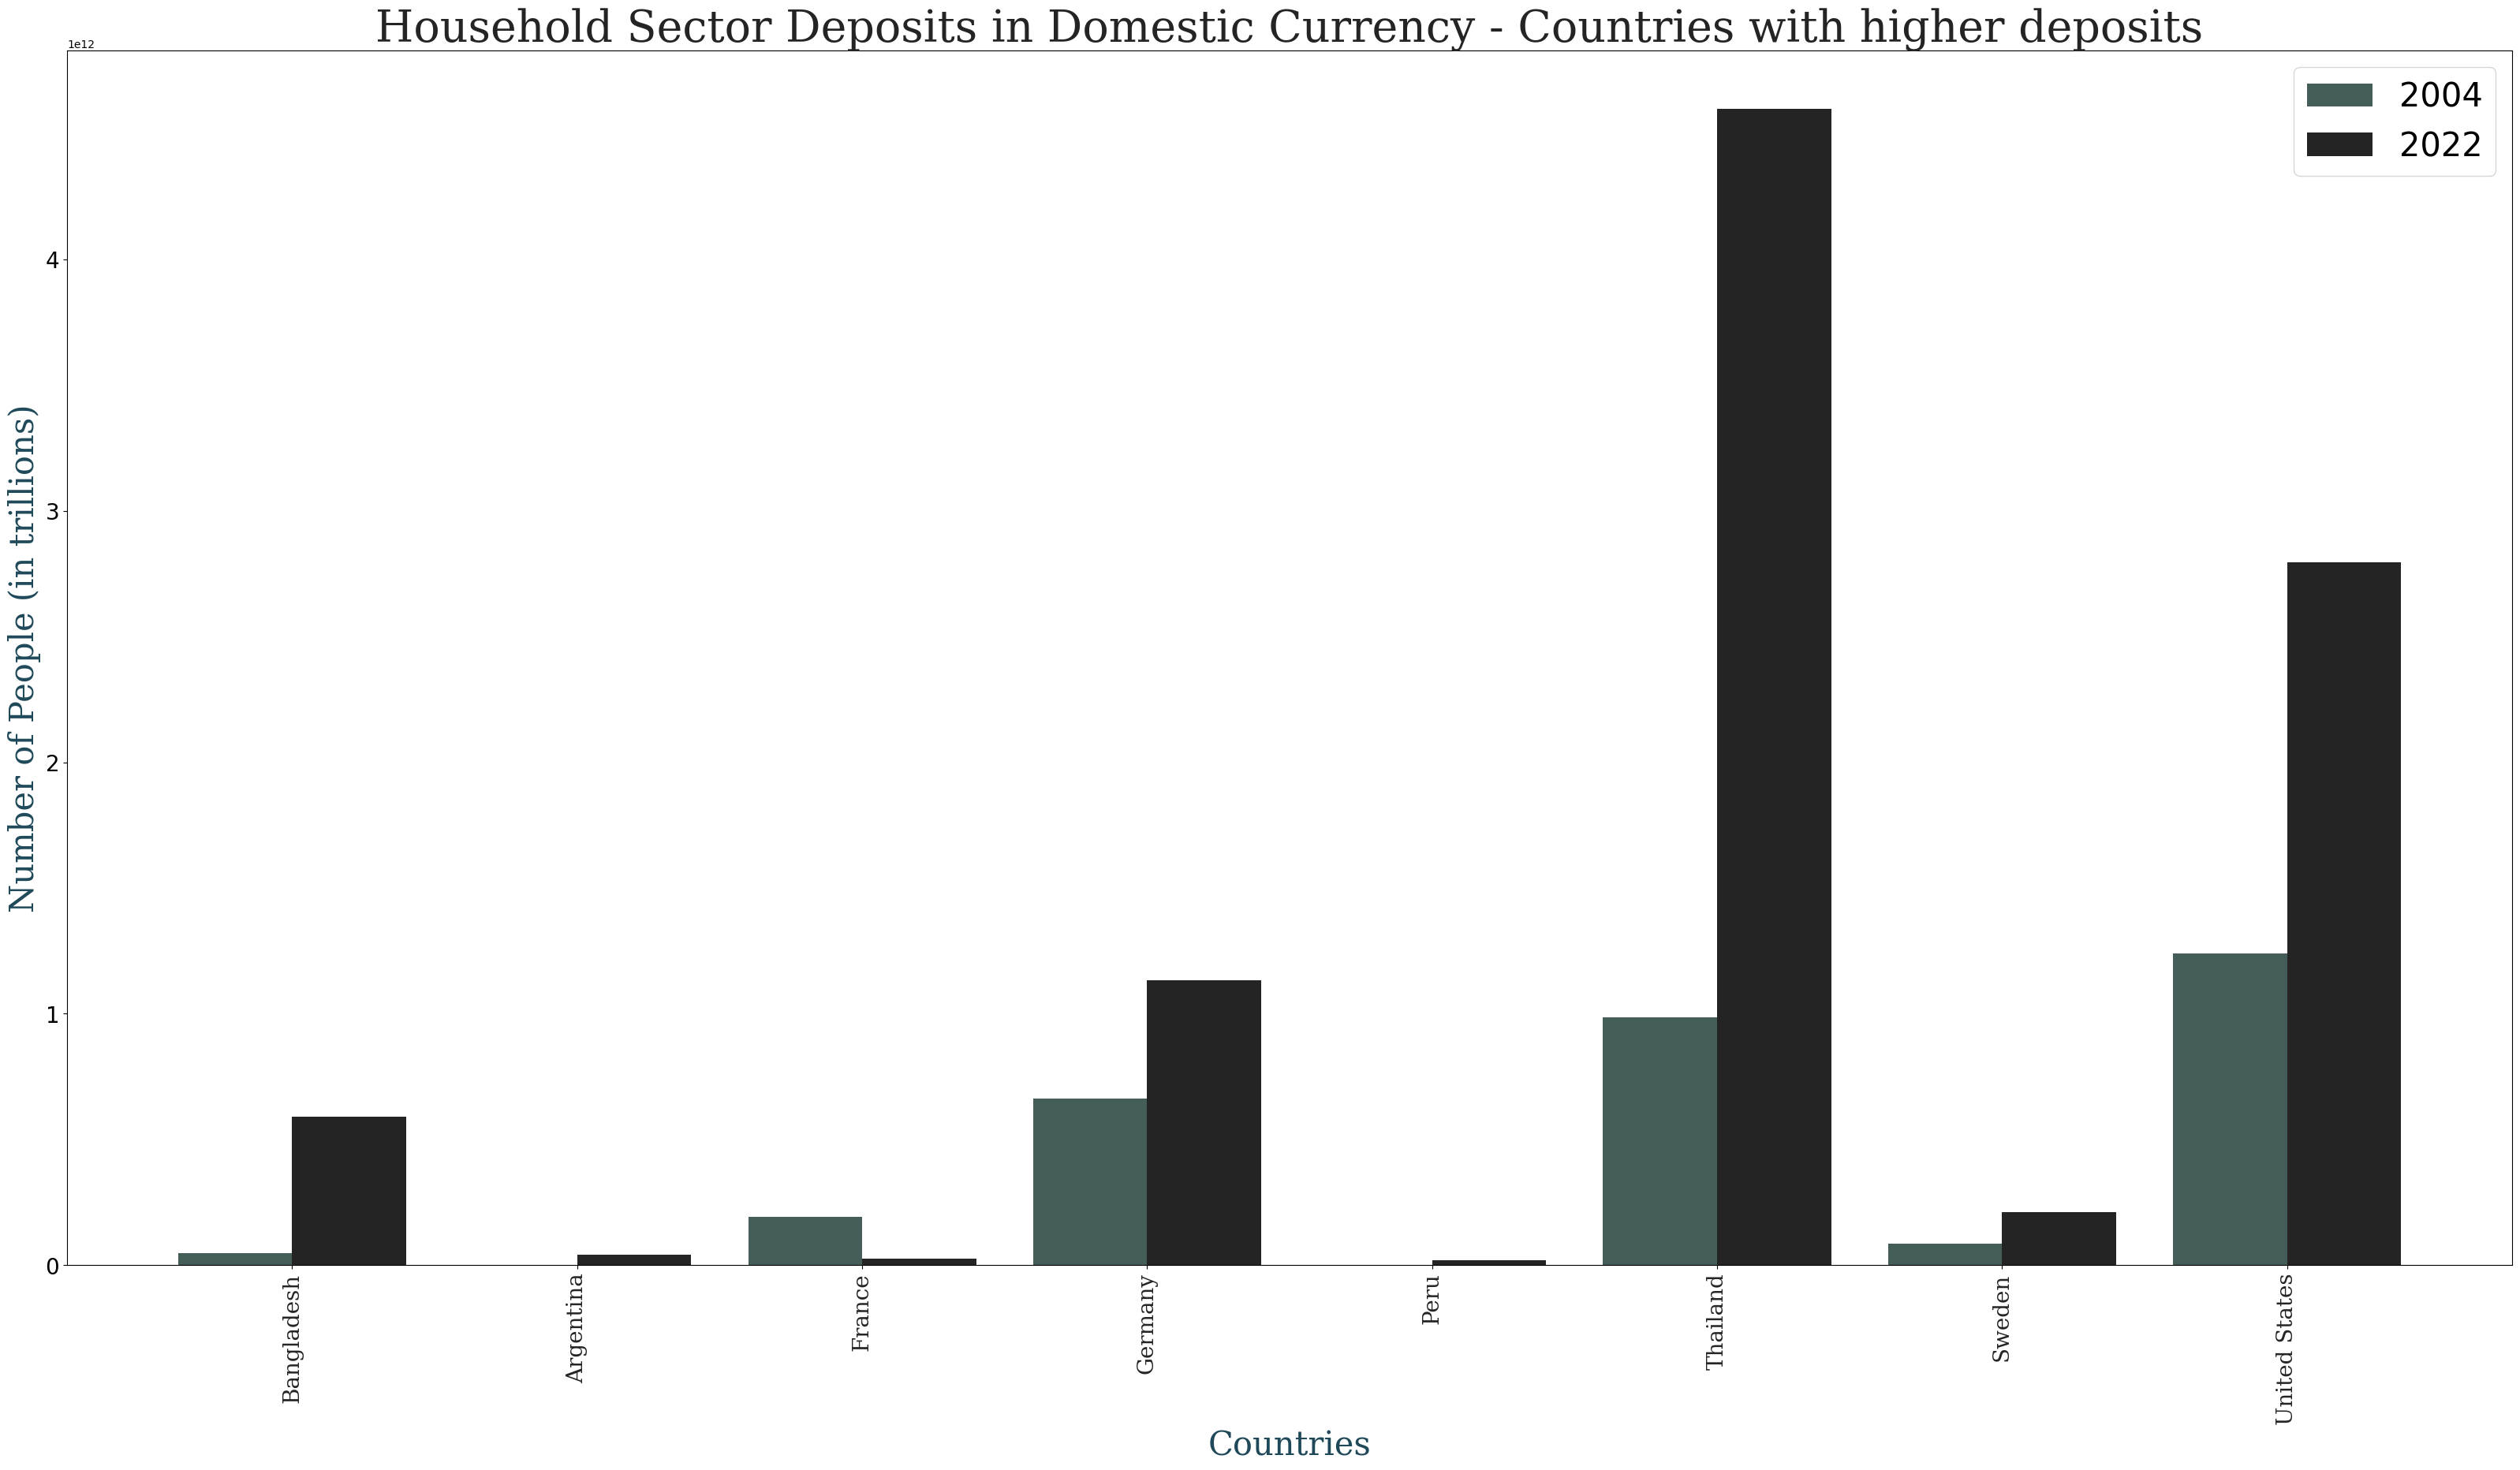

<Figure size 640x480 with 0 Axes>

In [ ]:
financialAccessSurvey = financialAccessSurvey.filter(items=['Country Name', 'Indicator Name', 'Indicator Code','2004', '2022'])
financialAccessSurvey = financialAccessSurvey[(financialAccessSurvey['Indicator Code'] == "FCLODDH_XDC")]

financialAccessSurvey.head(200)

convert_dict = {'2022': float}

financialAccessSurvey = financialAccessSurvey.astype(convert_dict)

financialAccessSurvey.info()

import matplotlib.pyplot as plt

#remove values with null rows
financialAccessSurvey = financialAccessSurvey.dropna()

#replace 1e12 with trillion

financialAccessSurvey["2004"] = financialAccessSurvey["2004"].replace(1e12, 1000000000000)
financialAccessSurvey["2022"] = financialAccessSurvey["2022"].replace(1e12, 1000000000000)
financialAccessSurvey["Country Name"] = financialAccessSurvey["Country Name"].str.replace("Rep. of", '')

#Include Highest: Bangladesh, Germany, Thailand, Sweden, United States, France, Argentina, Peru
financialAccessSurvey = financialAccessSurvey[financialAccessSurvey['Country Name'].isin(['Bangladesh', 'Germany', 'Thailand', 'Sweden', 'United States', 'France', 'Argentina', 'Peru'])]

## MAKING GRAPH 1 FOR HOUSEHOLD SECTOR DEPOSITICS IN DOMESTIC CURRENCY

#Assigning a column to each variable
X = financialAccessSurvey["Country Name"]
Ygirls = financialAccessSurvey["2004"]
Zboys = financialAccessSurvey["2022"]

#Deciding the size of the graph
plt.figure(figsize=(40,20))

X_axis = np.arange(len(X))

#Plotting the bars
plt.bar(X_axis - 0.2, Ygirls, 0.4, label = '2004', color = "#455D58")
plt.bar(X_axis + 0.2, Zboys, 0.4, label = '2022', color = "#242424")

#Fun fonts
font1 = {'family':'serif','color':'#242424','size':40}
font2 = {'family':'serif','color':'#1F4959','size':30}
font3 = {'family':'serif','color':'#242424','size':20}

plt.xticks(X_axis, X, fontdict = font3)
plt.xticks(rotation=90)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Countries", fontdict = font2)
plt.ylabel("Number of People (in trillions)", fontdict = font2)
plt.title("Household Sector Deposits in Domestic Currency - Countries with higher deposits", fontdict = font1)
plt.legend(prop = { "size": 30 })
plt.show()

plt.savefig('HouseholdSectorDeposits.png')